In [ ]:
#RANDOM_FOREST

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('train(1).csv')

In [ ]:

df.head()#first five rows

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
df.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [ ]:
from sklearn.feature_selection import f_classif,mutual_info_classif,SelectPercentile
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import pickle

In [ ]:
X = df.drop(columns=['target'])
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
df.head(2000001)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [ ]:
df.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [ ]:
df.drop('ID_code',axis=1,inplace=True)

<Axes: xlabel='target', ylabel='count'>

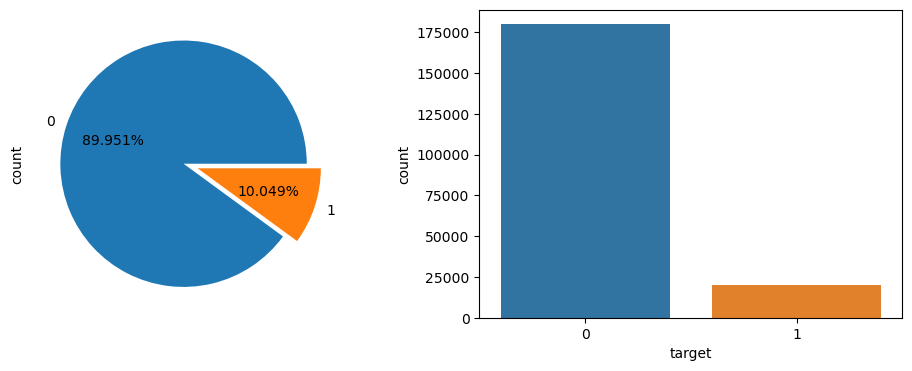

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
df.target.value_counts().plot.pie(explode=[0, 0.12], autopct='%1.3f%%', ax=ax[0])
sns.countplot(x='target', data=df, ax=ax[1])


In [ ]:

from imblearn.over_sampling import ADASYN

y = df.target
X = df.iloc[:,1:]
sampler = ADASYN(random_state=0)
overSamp_X,overSamp_y = sampler.fit_resample(X,y)
overSamp_y.value_counts(dropna=False)

target
1    187938
0    179902
Name: count, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler  # Import RandomUnderSampler

y = df['target']  # Select the target column
X = df.iloc[:, 1:]  # Select features (excluding the first column, assuming it's not part of the features)

sampler = RandomUnderSampler(random_state=0)  # Create the RandomUnderSampler object
underSamp_X, underSamp_y = sampler.fit_resample(X, y)  # Perform undersampling

underSamp_y.value_counts(dropna=False)  # Check the distribution of the


target
0    20098
1    20098
Name: count, dtype: int64

In [ ]:

df = pd.concat([overSamp_X,overSamp_y],axis=1)
df = df.sample(frac=1,random_state=1) #To randomize the data
df.head(10)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
254549,12.801032,-0.234137,7.204692,6.488525,11.877978,-10.991217,5.109014,14.690664,-1.997388,8.097423,...,9.527156,2.000823,7.005444,18.052214,0.437979,11.948677,9.252721,11.386613,7.455510,1
339646,11.758228,-4.113063,13.852329,10.214027,11.924109,6.935680,6.641500,19.971275,4.919980,7.165361,...,9.659922,2.442496,-0.161721,19.290915,0.161389,-2.082418,9.443250,15.682495,8.300173,1
288990,16.130706,-3.969707,10.118114,6.724830,11.085619,-8.204975,4.955094,11.683073,3.069200,7.396528,...,3.416596,2.465079,3.906831,21.049500,0.848300,5.334066,9.337713,14.847017,-12.612345,1
251370,7.643475,0.806717,12.113520,8.647463,13.101162,-14.492049,4.634995,16.021046,-2.708482,6.355035,...,6.108591,3.600922,5.629327,16.715065,-1.495991,9.069211,8.864333,10.627334,-8.150509,1
262933,8.988784,0.348474,9.613160,5.020276,9.147571,0.195828,5.549134,20.847315,1.022663,8.533282,...,6.400665,0.936761,7.735676,18.273099,0.595127,2.635183,8.829247,16.942815,6.520807,1
35127,10.807000,1.198400,13.847800,4.758500,11.867500,-8.303400,6.104400,15.826800,4.673800,6.907600,...,13.882900,1.105500,6.318700,17.054400,-0.462600,4.695400,8.981300,11.655600,-1.198500,0
137367,7.628800,0.712200,7.624400,4.726600,11.515000,0.905500,6.491300,19.799100,2.295700,7.998000,...,4.771800,3.626700,8.424500,21.540600,-3.006400,0.424500,10.207500,15.816900,4.896900,0
202392,12.053214,-3.808164,14.912667,5.015039,11.344741,-16.684191,6.417626,11.207981,2.068909,6.361619,...,9.063199,3.234551,4.383339,21.191785,0.031064,-0.095146,8.723784,19.949944,3.853575,1
88981,9.231700,-0.024500,11.503100,3.790500,11.723000,-9.313600,5.765600,16.759300,1.328700,8.962100,...,9.276800,1.506000,4.709600,21.546100,1.067500,-5.171100,7.975100,11.881600,-22.600000,0
286456,11.706073,-0.845476,13.214649,7.430901,11.359308,-1.423411,6.008622,15.439566,-1.751960,6.152053,...,1.744418,1.451225,8.783622,17.160841,0.853086,9.563296,7.318500,11.869730,5.616239,1


In [ ]:
F_stat,p_value = f_classif(df.drop('target',axis=1),df.target)
for col,stat,p in zip(df.drop('target',axis=1),F_stat,p_value):
    print(col,stat," : ",p)

var_0 2880.596646734631  :  0.0
var_1 2767.077349841928  :  0.0
var_2 3499.8344187527073  :  0.0
var_3 178.46681019146146  :  1.0707517604771611e-40
var_4 139.34463719900498  :  3.752671213780399e-32
var_5 950.8719785378613  :  1.585533998465283e-208
var_6 5422.082887703735  :  0.0
var_7 9.398230075857096  :  0.0021721074958717603
var_8 367.46714903370224  :  7.306785278062584e-82
var_9 1937.4087918065034  :  0.0
var_10 0.48171333119943244  :  0.48764770956572745
var_11 590.5321083427685  :  2.434103152564295e-130
var_12 5625.105055808305  :  0.0
var_13 3122.665512014799  :  0.0
var_14 52.45766452553203  :  4.404779383427984e-13
var_15 274.2333334721079  :  1.4277328222095105e-61
var_16 17.614090000414464  :  2.7063962320863778e-05
var_17 4.133763691408472  :  0.04203647854709667
var_18 1957.2266592880344  :  0.0
var_19 71.98924521853696  :  2.1715790108909987e-17
var_20 399.4011316578865  :  8.290633454965593e-89
var_21 3744.7963118813354  :  0.0
var_22 3843.5941515633813  :  0.0
var_

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame and X_train contains categorical columns
y = df['target']  # Your target column
X = df.drop('target', axis=1)  # Drop the target column to get the features

# One-hot encode the categorical features
X_encoded = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to numerical

# Now, split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit the RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, max_depth=17, verbose=2)
model.fit(X_train, y_train)  # Train the model

# Check the scores
print(model.score(X_train, y_train))  # Training score
print(model.score(X_test, y_test))  # Test score


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 52.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   39.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.9774834167029143
0.931723031752936


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   10.3s finished


In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


              precision    recall  f1-score   support

           0       0.89      0.96      0.93     33316
           1       0.97      0.91      0.94     40252

    accuracy                           0.93     73568
   macro avg       0.93      0.93      0.93     73568
weighted avg       0.93      0.93      0.93     73568



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    9.7s finished


In [ ]:
#LOGISTIC_REGRESSION_MODEL

In [ ]:
# Import necessary libraries
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report

In [ ]:
# Load the dataset
data = pd.read_csv('train(1).csv')

In [ ]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
data.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [ ]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [ ]:
#checking missing values
data.isnull().sum()

,0
ID_code,0
target,0
var_0,0
var_1,0
var_2,0
...,...
var_195,0
var_196,0
var_197,0
var_198,0


In [ ]:
# Separate features and target
X = data.drop(columns=['ID_code', 'target'])
y = data['target']

In [ ]:
X.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape

((160000, 200), (40000, 200))

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.533571,-1.670477,-0.577120,0.618509,-1.263937,0.395017,-0.290156,1.350141,0.739687,0.804082,...,0.500929,0.169876,-0.682133,0.667273,-2.229998,-0.664679,-0.851566,-0.800368,-0.982862,0.134655
1,1.554858,1.089333,-0.538958,0.196006,-1.564960,0.066360,0.015289,-1.925062,1.135485,0.728461,...,-0.050468,-0.589204,0.152931,-0.494980,-0.806251,0.287944,0.777978,-0.476118,2.051045,0.461005
2,-0.342306,-0.740700,-1.423507,-0.680204,0.621278,-0.791342,-1.014795,-0.785731,-0.334996,0.704091,...,0.043648,0.575894,-0.288381,-0.335338,0.767173,0.021920,-0.318297,0.456887,-0.985052,-0.583948
3,-0.327364,-0.998477,0.209807,0.724135,1.752765,-1.407879,-0.509684,1.041895,-1.880909,0.714293,...,-1.796646,0.607251,-0.534172,0.103758,0.857540,1.061818,0.941400,0.332551,0.800514,0.071847
4,-1.174970,-0.112474,0.289314,0.734927,-0.282716,-0.179165,-0.461876,1.308638,-1.578072,1.260479,...,0.904742,0.252171,-0.394464,1.392859,1.170191,-1.337501,0.767937,-0.648559,-0.694699,-0.245862


In [ ]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions
y_pred = logistic_model.predict(X_test_scaled)
y_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [ ]:
# Display the metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Accuracy: 0.91
Precision: 0.70
Recall: 0.27
F1 Score: 0.39
ROC AUC Score: 0.86


In [ ]:
#classification report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35903
           1       0.70      0.27      0.39      4097

    accuracy                           0.91     40000
   macro avg       0.81      0.63      0.67     40000
weighted avg       0.90      0.91      0.90     40000



In [ ]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[35420   483]
 [ 2993  1104]]


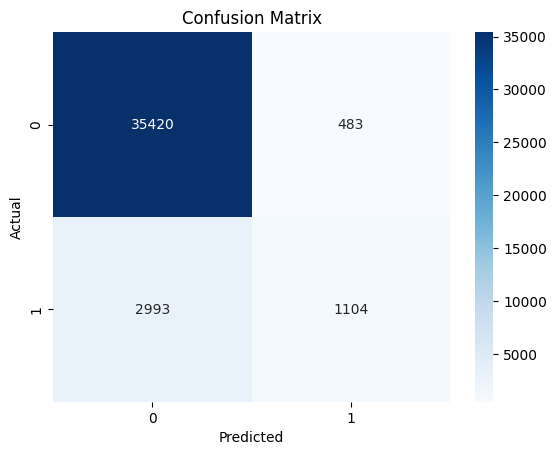

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_test.value_counts()

,count
target,
0,35903
1,4097


In [ ]:
#support vector machines

In [ ]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
path='/content/drive/MyDrive/another train/train(1).csv'

In [ ]:
cus_pred=pd.read_csv(path)

In [ ]:
#Checking the first 10 lines to examine the data
cus_pred.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [ ]:
#As data already has its index, we need to clean it to remove the ID_Code
cus_pred.drop('ID_code',axis=1,inplace=True)

In [ ]:
cus_pred.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
cus_pred.columns

Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [ ]:
cus_pred.shape

(200000, 201)

In [ ]:
#Checking dataframe for types of data, null, duplicates
cus_pred.info()
# There are 200 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 306.7 MB


In [ ]:
cus_pred.isnull().sum()
# There are no null values

,0
target,0
var_0,0
var_1,0
var_2,0
var_3,0
...,...
var_195,0
var_196,0
var_197,0
var_198,0


In [ ]:
cus_pred.value_counts()

target  var_0    var_1    var_2    var_3    var_4    var_5     var_6   var_7    var_8    var_9   var_10   var_11    var_12   var_13   var_14   var_15   var_16   var_17    var_18   var_19   var_20   var_21   var_22  var_23  var_24   var_25   var_26    var_27   var_28  var_29  var_30    var_31   var_32   var_33   var_34   var_35    var_36   var_37  var_38   var_39   var_40    var_41    var_42   var_43   var_44    var_45    var_46   var_47    var_48    var_49   var_50   var_51   var_52    var_53  var_54    var_55   var_56   var_57  var_58    var_59   var_60   var_61    var_62   var_63   var_64  var_65   var_66  var_67    var_68  var_69    var_70    var_71  var_72   var_73   var_74    var_75   var_76   var_77   var_78  var_79   var_80    var_81   var_82    var_83    var_84    var_85   var_86    var_87   var_88   var_89    var_90    var_91  var_92   var_93   var_94   var_95   var_96   var_97    var_98  var_99   var_100   var_101  var_102  var_103  var_104  var_105  var_106  var_107  var_108  var_109  var_110   var_111  var_112  var_113  var_114  var_115  var_116  var_117   var_118   var_119  var_120  var_121  var_122   var_123   var_124  var_125  var_126  var_127  var_128  var_129  var_130  var_131  var_132  var_133  var_134   var_135   var_136  var_137  var_138  var_139   var_140   var_141   var_142  var_143  var_144  var_145  var_146  var_147   var_148  var_149   var_150  var_151  var_152  var_153  var_154  var_155   var_156  var_157   var_158  var_159  var_160  var_161  var_162  var_163  var_164  var_165  var_166  var_167   var_168   var_169  var_170   var_171  var_172  var_173   var_174  var_175  var_176   var_177  var_178   var_179  var_180  var_181  var_182   var_183  var_184   var_185  var_186  var_187   var_188  var_189  var_190  var_191  var_192  var_193   var_194  var_195  var_196   var_197  var_198  var_199 
0       0.4084   -2.3580  6.4101   6.3512   11.6226   2.3006   4.3739  19.5745   6.5962  6.8866  -7.2479  -9.0905   14.0932  10.5784  11.1659  14.4660  10.6531   4.3223   5.0071   17.1426  22.8688  15.1143  2.3188  2.6660  14.7837  14.3167   3.8104   -1.1849  6.1596  6.0388  -20.3091  13.0859  -3.4900  9.1578   11.6969   11.2737   3.2487  4.7856  8.5703    2.0635   2.0664    9.1290   10.2441  11.6189   11.5475   20.7040  7.6683   -6.7316    20.8507  24.3176  11.8015  19.6412   4.3782   6.6869   15.7498  23.1632  19.1327  6.3174   10.5814  10.7093  12.1390  -3.7999    0.3765  -1.4985  8.1610  -5.0029  7.8635   9.2880   5.0260  -4.5845    30.9502  0.3130   6.7575  4.3524    24.5397  15.7954  5.2969   18.0831  6.1789  12.1622   11.4620  15.5652   5.9090   -7.4081   -6.9034   20.5353   14.1981  12.9798  8.4437    12.5161  -2.6635   7.1410  8.5626   9.4655   10.0229   0.4944  21.1759   38.0685  1.5785  -0.2139  -13.3477  9.7507   28.7191  1.3254   11.1470  3.6549   6.2298   17.7993  14.2554  20.0058   4.5545   6.4697   5.3824   6.6683   3.6222    1.7651   2.1000   6.5213    9.1751    2.8865  7.3573   11.2315   2.7887    4.9833   5.2141   12.0629  12.4917   3.2849  -2.3577  23.0586  11.1357  0.0723   8.8580   7.1445   -9.2577   -14.1191  15.7234  6.7391    1.1076   12.4350   12.1909   4.8089   27.0461  14.2590  7.2777    6.2249  6.5634   -3.4550   3.7791    17.2574  21.3777  4.0784   9.2687   17.0664  7.7860   -9.4234   14.7269  -10.3761  12.7907  6.4404   28.8486  5.5818   2.8279   1.5165    1.6460  16.9130  2.8582   -14.4877   1.5238   5.4749   -7.2798    3.3161  17.2790  -2.1368   24.9956  6.5182    6.6007   8.4200    11.1248   1.1762   8.6281  8.8447    8.3310   11.5586   15.8455   5.5192  8.3884   -24.1309  19.7900  -0.0351  1.6410   8.2690    2.2166   4.5286   16.0699  -0.4181  -3.5543   7.3749   13.1001  -16.6303    1
        12.6091  -3.8639  12.4198  7.8099   12.4014  -16.5756  3.6081  21.5824   1.3495  7.6878   0.3568  -6.6769   14.1888  3.5185   5.7553   14.6590  8.5893    1.1758   5.3322   16.2673  8.3017   3.7842   6.5830  1.7170  9.1146   13.7775  -16.6650  -2.0079  6.3486  7.4667  -21.8575  14.6702   1.7528 

In [ ]:
cus_pred.nunique()

,0
target,2
var_0,94672
var_1,108932
var_2,86555
var_3,74597
...,...
var_195,57870
var_196,125560
var_197,40537
var_198,94153


In [ ]:
#Checking duplicate
cus_pred.duplicated().sum()
#There are no duplicates

0

In [ ]:
cus_pred.describe().T
#There are no constant features in the data

,count,mean,std,min,25%,50%,75%,max
target,200000.0,0.100490,0.300653,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,200000.0,10.679914,3.040051,0.4084,8.453850,10.52475,12.758200,20.3150
var_1,200000.0,-1.627622,4.050044,-15.0434,-4.740025,-1.60805,1.358625,10.3768
var_2,200000.0,10.715192,2.640894,2.1171,8.722475,10.58000,12.516700,19.3530
var_3,200000.0,6.796529,2.043319,-0.0402,5.254075,6.82500,8.324100,13.1883
...,...,...,...,...,...,...,...,...
var_195,200000.0,-0.142088,1.429372,-5.2610,-1.170700,-0.17270,0.829600,4.2729
var_196,200000.0,2.303335,5.454369,-14.2096,-1.946925,2.40890,6.556725,18.3215
var_197,200000.0,8.908158,0.921625,5.9606,8.252800,8.88820,9.593300,12.0004
var_198,200000.0,15.870720,3.010945,6.2993,13.829700,15.93405,18.064725,26.0791


In [ ]:
# Data splitting into X and Y
X=cus_pred.drop('target',axis=1)
Y=cus_pred['target']

In [ ]:
#Import the train_test split from SKlearn
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
#We need to feature scale
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

In [ ]:
#Now the model can be trained
#We will import the SVC since it is for classification
from sklearn.svm import SVC

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svm.predict(X_test)
#Let us predict the X-test

In [ ]:
#Now we need to evaluate the model
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     53856
           1       0.78      0.23      0.36      6144

    accuracy                           0.91     60000
   macro avg       0.85      0.61      0.66     60000
weighted avg       0.90      0.91      0.89     60000

0.9147333333333333


In [ ]:
#The percentage of the true positive for class '0' is poor
#Thus, there is need to do hyper-parameter tunning
from sklearn.model_selection import GridSearchCV

In [ ]:
#Defining the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0],
    'kernel': ['rbf', 'linear', 'poly']
}

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, scoring='accuracy', cv=5)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END ........................C=0.1, gamma=1, kernel=rbf; total time=144.8min


# **REPORT ANALYSIS**



Problems faced

1)Interpretability:Lacking actual feature names,the variables are nigh unexplainable and it is difficult to explain model behavior or make domain-specific insights.

2)Curse of Dimensionality: The dataset is associated with a hundreds of variables.

3)Increased computation time.

4)Overfitting From The Curse Of Dimensionality.

5)The challenge of selecting relevant features.

6)The data is too much for an SVM.

7)It successfully initialised SVM after days.

8)Then to fit the GridSearch for hyper-parameter tunning became another problem.



# **BETTER MODEL IN PREDICTION**

We have done 3 model prediction in this model. The three of the model predictions are

1.   RandomForest.
2.   Logistic Regression.
3.   Support Vector Machines.

**RandomForest**

Class 0 F1 score: 0.93

Class 1 F1 score: 0.94

Macro avg F1 score: 0.93

Weighted avg F1 score: 0.93

Accuracy: 0.93


**Logistic Regression**

Class 0 F1 score: 0.95

Class 1 F1 score: 0.39

Macro avg F1 score: 0.67

Weighted avg F1 score: 0.90

Accuracy: 0.91


**Support Vector Machine**

Class 0 F1 score: 0.95

Class 1 F1 score: 0.36

Macro avg F1 score: 0.66

Weighted avg F1 score: 0.89

Accuracy: 0.91

# Analysis:
First Report has the best performance overall:
It achieves high F1 scores for both Class 0 (0.93) and Class 1 (0.94).
The macro average F1 score and weighted average F1 score are both 0.93, indicating balanced and effective prediction across all classes.
The accuracy of 0.93 further supports its strong overall performance.


# **Conclusion:**
The first report represents the best model among the three, as it shows the highest and most balanced F1 scores, indicating that it performs well for both classes without significant bias.



